## 中国债务情况

地方政府债券余额

- 截至8月末，全国地方政府债券余额434634.57亿元(约<font color="#ff0000">43万亿</font>)，其中一般债券余额162122.36亿元，专项债券余额272512.21亿元。
- 地方政府债券<font color="#ff0000">剩余平均年限9.4年</font>（其中一般债券6.2年，专项债券11.3年），比上年末增加0.3年。
- <font color="#ff0000">地方政府债券平均利率3.15%</font>，其中一般债券3.16%，专项债券3.14%。
- 加上<font color="#ff0000">非政府债券形式存量政府债务</font>1662.16亿元，全国地方政府债务余额为436296.73亿元，控制在全国人大批准的债务限额467874.30亿元以内。

简单计算：
- 还款利息总额：436296.73*(1+3.15%)^9.4= 583972.965 （亿）
- <span style="background:#ff4d4f">每年利息支出</span>：583972.965/10= 5.8（万亿）

值得注意的是，我国地方政府债务余额逐年升高的同时，地方财政收入并未呈现逐年升高的迹象，与此相反，我国地方政府财政赤字等指标却在逐年升高。

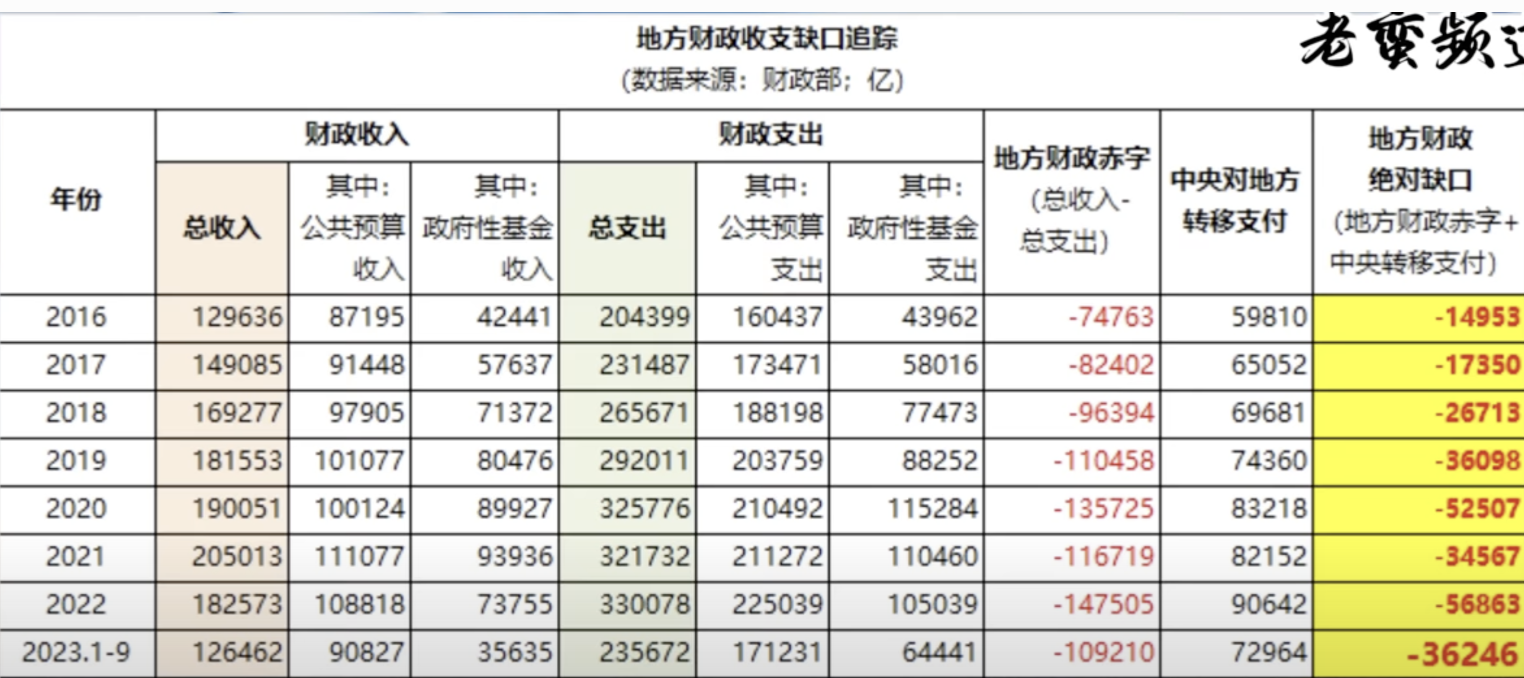

## Data

In [1]:
* 设置第一行为标签，第二行为变量
import excel "Raw/CNBS（中国宏观杠杆率数据）.xlsx", sheet("Data") cellrange(A1:I127)  clear 
// labone,nrow(1 2) concat(/) // 第一二行作为标签
labone,nrow(1) concat(/) // 第一行作为标签
foreach var of varlist _all {
	qui replace `var' = trim(`var') if _n == 2  // 清除首尾空格
	qui replace `var' = subinstr(`var', "-", "_", .) if _n == 2 // 替换连字符"-"
    qui replace `var' = subinstr(`var', " ", "_", .) if _n == 2 // 替换中间空格
	qui replace `var' = subinstr(`var', "(", "", .) if _n == 2 // 替换括号
	qui replace `var' = subinstr(`var', ")", "", .) if _n == 2 // 替换括号
}
nrow 2 // 第二行作为变量名 

// 统一变量名大小写
// local varlist `:varlist'
foreach var of varlist _all {
    qui local newvar = lower("`var'")
    qui rename `var' `newvar'
}

// export excel using "Raw/CNBS.xlsx",  firstrow(variables) nolabel replace 
// import excel using "Raw/CNBS.xlsx", clear firstrow

qui destring *,replace // 转为数值
gen date  = date(period, "DMY") 
format date %td

tsset date
drop period 

save Data/debt.dta, replace 



. import excel "Raw/CNBS（中国宏观杠杆率数据）.xlsx", sheet("Data") cellrange(A1
> :I127)  clear 
(9 vars, 127 obs)

. labone,nrow(1) concat(/) 
In this case:
         # of concatenating sysboms is 1.
         # of located rows is 1.
         Only the first 0 concatenating sysboms is used.

. foreach var of varlist _all {
  2.  qui replace `var' = trim(`var') if _n == 2  
  3.  qui replace `var' = subinstr(`var', "-", "_", .) if _n == 2 
  4.     qui replace `var' = subinstr(`var', " ", "_", .) if _n == 2 
  5.  qui replace `var' = subinstr(`var', "(", "", .) if _n == 2 
  6.  qui replace `var' = subinstr(`var', ")", "", .) if _n == 2 
  7. }

. nrow 2 
(2 observations deleted)

. foreach var of varlist _all {
  2.     qui local newvar = lower("`var'")
  3.     qui rename `var' `newvar'
  4. }

. qui destring *,replace 

. gen date  = date(period, "DMY") 

. format date %td

. tsset date

Time variable: date, 31dec1992 to 31dec2023, but with gaps
        Delta: 1 day

. drop period 

. save Data

In [2]:
use Data/debt.dta, clear
ds  
des2



household     central_go~t  general_go~t  finan~t_side  date
non_financ~s  local_gove~t  non_financ~r  finan~y_side


File: Data/debt.dta
Date: 25 Oct 2024 22:11
obs:  125
vars: 9

variable name   type    format    value label   variable label

household       double  %10.0g                  居民部门
non_financial~s double  %10.0g                  非金融企业部门
central_gover~t double  %10.0g                  中央政府
local_governm~t double  %10.0g                  地方政府
general_gover~t double  %10.0g                  政府部门
non_financial~r double  %10.0g                  实体经济部门
financia~t_side double  %10.0g                  金融部门资产方
financia~y_side double  %10.0g                  金融部门负债方
date            double  %td                     


## 图形分析

### 中国宏观经济的杠杆率

- ⾮银⾏⾮⾦融的企业负债，政府部门的负债，加上居民部门的负债，三⽅⾯加起来是GDP的6倍
- 美国?⽇本?
    - 横向对比 # todo

(file plot1.gph not found)
file plot1.gph saved


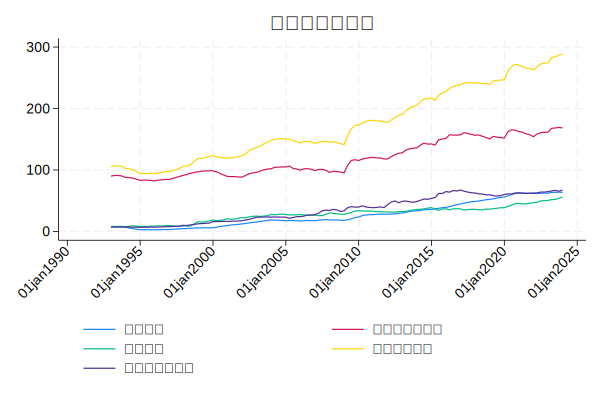

In [3]:
// 整体
tsline household non_financial_corporations general_government non_financial_sector financial_sectorliability_side, title("中国宏观杠杆率") xtitle("") /// 
		xlab(,angle(45)) saving(plot1.gph,replace)
// graph export using "$Figure/中国宏观杠杆率", replace


美国债务和我们结构有所不同。美国的企业负债率总体很低。因为美国企业每年新增的融资⼤部分是股权⽽不是债权。

. cap noi tsline household general_government non_financial_sector, title("三�
> ��门杠杆对比")   xtitle("") xlab(,angle(45)) saving(plot2, replace)
(file plot2.gph not found)
file plot2.gph saved

. if _rc == 0 {
.     noi gr export `"/Users/mac/.stata_kernel_cache/tmpudg5ntcf/graph$stata_ke
> rnel_graph_counter.svg"', width(600) replace


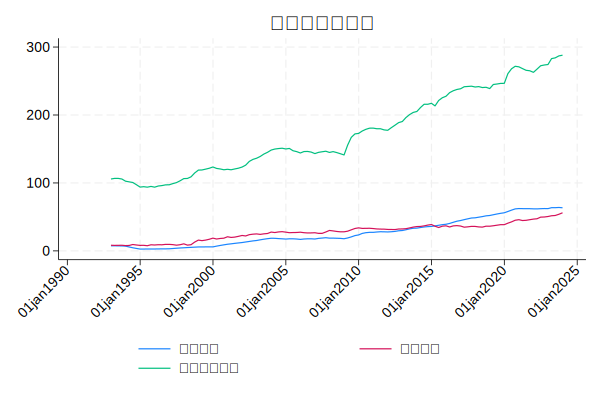

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [4]:
// 部门对比
tsline household general_government non_financial_sector, title("三部门杠杆对比") /// 
		xtitle("") xlab(,angle(45)) saving(plot2, replace)
		
// graph export using $Figure/三部门杠杆对比, replace 



. cap noi tsline *government, title("中央-地方杠杆率") xlab(,angle(45)) 
>   xtitle("") saving(plot3, replace)
(file plot3.gph not found)
file plot3.gph saved

. if _rc == 0 {
.     noi gr export `"/Users/mac/.stata_kernel_cache/tmpudg5ntcf/graph$stata_ke
> rnel_graph_counter.svg"', width(600) replace


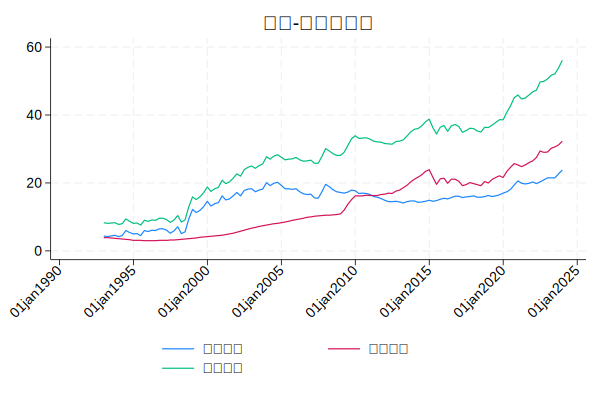

.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [5]:
// 央地对比
tsline *government, title("中央-地方杠杆率") xlab(,angle(45)) /// 
		xtitle("") saving(plot3, replace)
// graph export using $Figure/政府杠杆率, replace 
		


(file plot4.gph not found)
file plot4.gph saved


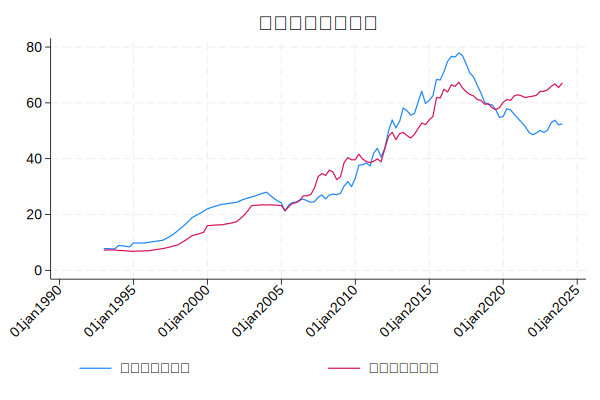

In [6]:
// 资产负债
tsline  financial_sectorasset_side financial_sectorliability_side, title("金融部门资产负债") /// 
		xtitle("") xlab(,angle(45)) saving(plot4, replace)
// graph export using	$Figure/金融部门资产负债, replace



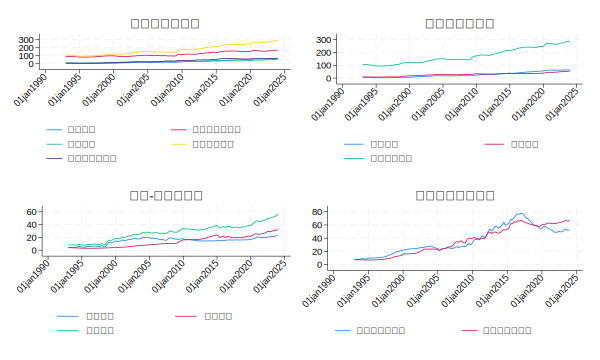

In [7]:
graph combine plot1.gph plot2.gph plot3.gph plot4.gph, row(2)